In [44]:
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import os
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [5]:
configuration_csv_path = "configs/tasks-configuration.csv"

In [6]:
def get_class_distribution(dataset_path):
    class_distribution_map = {}
    for subfolder in glob(dataset_path + "/*", recursive=False):
        key = os.path.basename(subfolder)
        class_distribution_map[key] = len(list(os.scandir(subfolder)))
    return class_distribution_map

In [7]:
df_config = pd.read_csv(configuration_csv_path, index_col=0)
dataset_list = df_config["dataset_path"].unique()

In [11]:
dataset_list[1]

'../datasets/plantdoc-dataset/all/'

<BarContainer object of 28 artists>

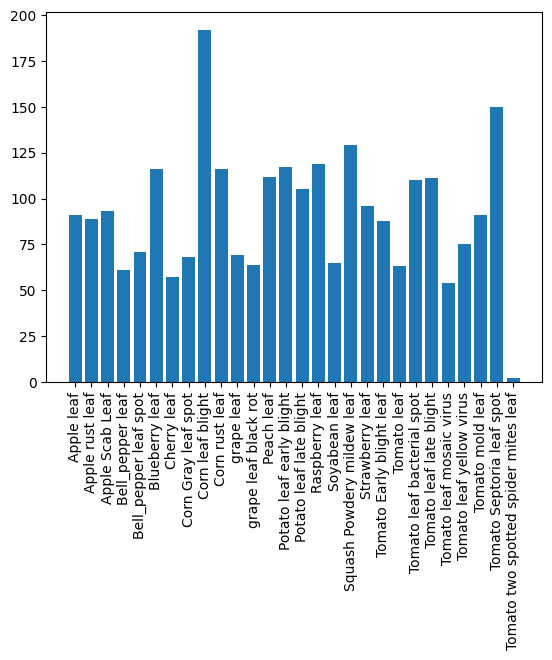

In [10]:
class_distribution_map = get_class_distribution(dataset_list[1])

keys = []
values = []
for key in class_distribution_map:
    keys.append(key)
    values.append(class_distribution_map[key])
plt.xticks(rotation='vertical')
plt.bar(keys, values)

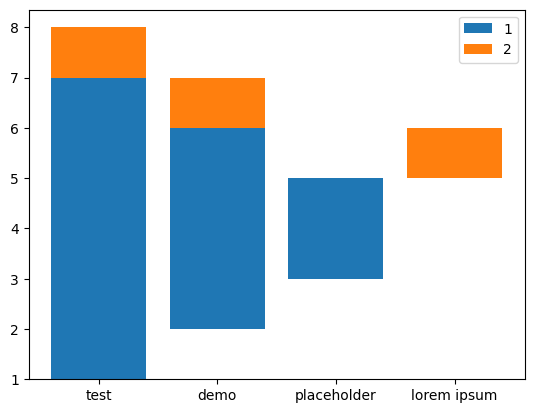

In [50]:
# example
plt.bar(["test", "demo", "placeholder"], [6, 4, 2], bottom=[1,2,3])
plt.bar(["test", "demo", "lorem ipsum"], [1, 1, 1], bottom=[7, 6, 5])
plt.legend([1,2,3])

In [89]:
df_full = pd.read_csv("../datasets/intermediate-features/PAD_UFES_20-ResNet50-Random_19.csv", index_col=0)

In [90]:
# df_features[["target", "set"]]
df_full.groupby(["target","set"])["set"].count()

target  set  
0       test      73
        train    584
        valid     73
1       test      84
        train    676
        valid     85
2       test       5
        train     42
        valid      5
3       test      25
        train    195
        valid     24
4       test      20
        train    153
        valid     19
5       test      23
        train    188
        valid     24
Name: set, dtype: int64

In [105]:
df_train = df_full[df_full["set"] == "train"]
df_valid = df_full[df_full["set"] == "valid"]
df_test = df_full[df_full["set"] == "test"]

target_group = df_train.groupby("target")
df_train = target_group.sample(
    42, random_state=19, replace=True
)

df_train_features = df_train.loc[:, ~df_train.columns.isin(["target", "set"])]
df_valid_features = df_valid.loc[:, ~df_valid.columns.isin(["target", "set"])]
df_test_features = df_test.loc[:, ~df_test.columns.isin(["target", "set"])]

scaler = StandardScaler()
train_features = scaler.fit_transform(df_train_features)
valid_features = scaler.transform(df_valid_features)
test_features = scaler.transform(df_test_features)

train_targets = df_train["target"].to_numpy()
valid_targets = df_valid["target"].to_numpy()
test_targets = df_test["target"].to_numpy()

In [106]:
print(len(df_train[df_train["target"]==0]))
print(len(df_train[df_train["target"]==1]))
print(len(df_train[df_train["target"]==2]))
print(len(df_train[df_train["target"]==3]))
print(len(df_train[df_train["target"]==4]))
print(len(df_train[df_train["target"]==5]))

42
42
42
42
42
42


In [107]:
train_targets

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int64)

In [108]:
model_lr = LogisticRegression(max_iter=10000)
model_lr.fit(train_features, train_targets)

valid_pred = model_lr.predict(valid_features)
test_pred = model_lr.predict(test_features)

In [109]:
valid_pred

array([1, 2, 0, 4, 0, 2, 3, 5, 4, 1, 5, 0, 5, 3, 4, 0, 2, 0, 3, 5, 0, 5,
       1, 4, 2, 1, 1, 1, 4, 4, 1, 5, 3, 0, 1, 3, 5, 4, 0, 2, 3, 5, 0, 4,
       1, 4, 5, 5, 1, 1, 3, 5, 0, 4, 0, 1, 3, 0, 2, 3, 5, 0, 2, 0, 0, 5,
       2, 0, 5, 1, 3, 4, 0, 5, 4, 4, 2, 5, 5, 5, 0, 4, 1, 3, 5, 0, 5, 5,
       5, 1, 2, 3, 0, 5, 0, 5, 4, 2, 0, 2, 1, 0, 5, 5, 2, 0, 1, 5, 4, 5,
       1, 5, 0, 5, 0, 0, 3, 1, 5, 4, 1, 0, 2, 4, 3, 3, 3, 5, 2, 0, 5, 2,
       5, 1, 1, 0, 3, 4, 4, 4, 4, 2, 3, 0, 0, 3, 2, 0, 5, 3, 5, 5, 5, 5,
       3, 5, 3, 3, 5, 1, 4, 3, 0, 4, 2, 5, 4, 5, 3, 0, 3, 5, 3, 4, 0, 4,
       5, 3, 0, 0, 4, 2, 1, 1, 1, 0, 0, 2, 5, 2, 5, 0, 5, 0, 1, 3, 3, 5,
       2, 1, 1, 2, 0, 5, 5, 0, 4, 0, 2, 2, 0, 0, 3, 5, 4, 2, 1, 1, 5, 1,
       1, 5, 3, 4, 3, 4, 1, 0, 2, 1], dtype=int64)

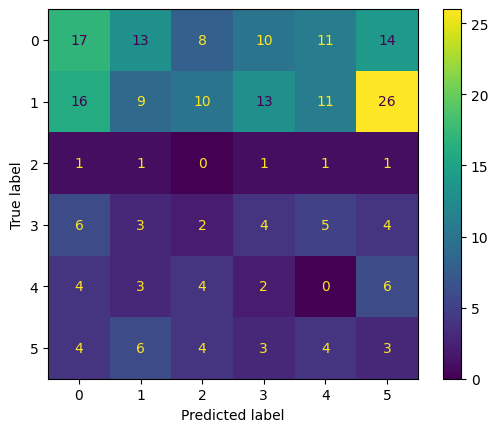

In [110]:
cm = confusion_matrix(valid_targets, valid_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

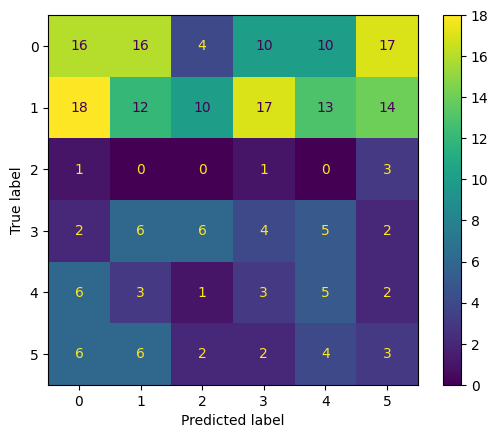

In [111]:
cm = confusion_matrix(test_targets, test_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()